# Pyber data analysis

### Rides, fare and drivers trends
- Looking at the data, it is clear that avarage fares are lower in urban cities at the same time that there are more drivers and rides per city. Lower fares are explained by the increase in competition asociated withe the urbanization. 
- Despite the lowere fare, the participation in the total ammout collected is biger in urban cities (62.7%) than any other type of population center, this because urban cities also accoutns for the 68.4% of total rides.
- The proportion of drivers in urban cities is an example of the enourmus competition there is in the market. more than 87% of drivers are located in urban cities, driving down the fare paid by users

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_dt = "data/city_data.csv"
ride_dt = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_dt, encoding="utf-8")
ride = pd.read_csv(ride_dt, encoding="utf-8")

# Combine the data into a single dataset
ride=ride.merge(city, how="left", on="city")

In [2]:
# Display the data table for previewabs
ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

    type            city  ride_id       fare  driver_count
0  Rural    Bradshawfurt       10  40.064000           7.0
1  Rural       Garzaport        3  24.123333           7.0
2  Rural  Harringtonfort        6  33.470000           4.0
3  Rural     Jessicaport        6  36.013333           1.0
4  Rural      Lake Jamie        6  34.358333           4.0


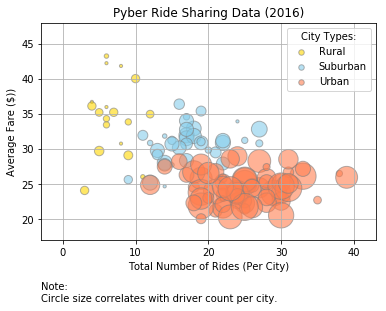

In [3]:
# Obtain the x and y coordinates for each of the three city types
## Obtaining the Total Number of rides per city types 
tRide=pd.DataFrame(ride.groupby(["type", "city"]).count()["ride_id"]).reset_index()

## Obtaining the drivers count and the average fare per country
aFare=pd.DataFrame(ride.groupby(["type", "city"]).mean()[["fare", "driver_count"]]).reset_index()

## merging the data
RaidFare= tRide.merge(aFare, how="left", on=["city", "type"])

## Asign colors per city type
colors=pd.DataFrame({"type":RaidFare["type"].unique(), "color":["Gold", "SkyBlue", "Coral"]})

#Showing first five elements
print(RaidFare.head())

# Build the scatter plots for each city types
for tp in RaidFare["type"].unique():
    plt.scatter(RaidFare.loc[RaidFare["type"]==tp]["ride_id"],
                RaidFare.loc[RaidFare["type"]==tp]["fare"], 
                RaidFare.loc[RaidFare["type"]==tp]["driver_count"]*10,
                facecolor=colors.loc[colors["type"]==tp]["color"],
                edgecolors="grey", alpha=0.60)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($))")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylim(np.floor(min(RaidFare["fare"])/5)*5-3,np.ceil(max(RaidFare["fare"])/5)*5+3)
plt.xlim(np.floor(min(RaidFare["ride_id"])/5)*5-3,np.ceil(max(RaidFare["ride_id"])/5)*5+3)

# Create a legend
legend=plt.legend(loc='upper right', title="City Types:",
           prop={"size":10}, scatterpoints=1,
           labels=RaidFare["type"].unique())
for handle in legend.legendHandles:
    handle.set_sizes([30.0])

# Incorporate a text label regarding circle size
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.text(np.floor(min(RaidFare["ride_id"])/5)*5-3,
         (np.floor(min(RaidFare["fare"])/5)*5-3)-7.5,
         "Note:\nCircle size correlates with driver count per city.",
         va="center", ha="left")
plt.grid()
# Save Figure
plt.savefig("Pyber_scatter.png")
# Show plot
plt.show()


## Total Fares by City Type

In [4]:
# Calculate Type Percents
ride["ride"]=1
piDB_fare=pd.DataFrame(ride.groupby("type").sum()[["fare"]]).reset_index()

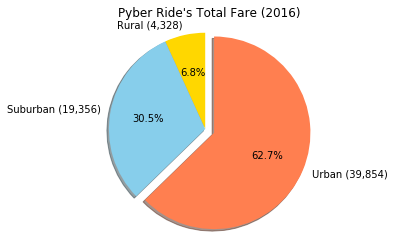

In [5]:
# Build Pie Chart
explode=[]
for ex in piDB_fare["fare"]:
    if (ex==max(piDB_fare["fare"])):
        explode.append(0.1)
    else:
        explode.append(0)
plt.pie(piDB_fare["fare"], explode=explode,
        labels=piDB_fare["type"]+" ("+pd.DataFrame(piDB_fare)["fare"].map("{:,.0f}".format).map(str)+")",
        colors=colors["color"],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Pyber Ride's Total Fare (2016)")
# Save Figure
plt.savefig("Pyber_farePie.png")
plt.show()

## Total Rides by City Type

In [6]:
## Total Rides Per City Type
# Calculate Ride Percents
piDB_ride=pd.DataFrame(ride.groupby("type").sum()[["ride"]]).reset_index()

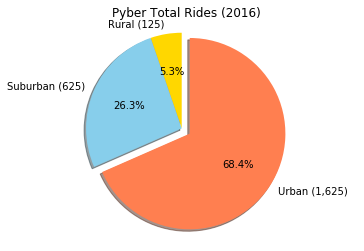

In [7]:
explode=[]
for ex in piDB_ride["ride"]:
    if (ex==max(piDB_ride["ride"])):
        explode.append(0.1)
    else:
        explode.append(0)
plt.pie(piDB_ride["ride"], explode=explode,
        labels=piDB_ride["type"]+" ("+pd.DataFrame(piDB_ride)["ride"].map("{:,.0f}".format).map(str)+")",
        colors=colors["color"],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Pyber Total Rides (2016)")
# Save Figure
plt.savefig("Pyber_RidesPie.png")
plt.show()

## Total Drivers by City Type

In [8]:
## Total Drivers Per City Type
# Calculate Ride Percents
piDB_driver=pd.DataFrame(ride.groupby(["city","type"]).mean()[["driver_count"]]).reset_index()
piDB_driver=pd.DataFrame(ride.groupby("type").sum()[["driver_count"]]).reset_index()

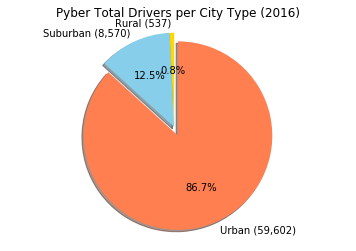

In [9]:
explode=[]
for ex in piDB_driver["driver_count"]:
    if (ex==max(piDB_driver["driver_count"])):
        explode.append(0.1)
    else:
        explode.append(0)
plt.pie(piDB_driver["driver_count"], explode=explode,
        labels=piDB_driver["type"]+" ("+pd.DataFrame(piDB_driver)["driver_count"].map("{:,.0f}".format).map(str)+")",
        colors=colors["color"],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Pyber Total Drivers per City Type (2016)")
# Save Figure
plt.savefig("Pyber_driverPie.png")
plt.show()